# Check the DMRG algorithm in the Critical point of the 2nn Case

We test the performance of DMRG in the critical point ($h_{max}=2e$) for different bond dimension and sweeps at a large size ($l=128,256$)

##### Imports

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#### Data

In [12]:
bonddim=np.array([200,300,400])
sweeps=np.arange(1,20)
seed=[12,35,356,145,98,236,659]
l=64
eng=np.zeros((bonddim.shape[0],sweeps.shape[0],len(seed)))
v=np.zeros((bonddim.shape[0],sweeps.shape[0],len(seed),l))
z=np.zeros((bonddim.shape[0],sweeps.shape[0],len(seed),l))
for i,b in enumerate(bonddim):
    for j,s in enumerate(sweeps):
        for k,w in enumerate(seed):
        
            data=np.load(f'data/check_dmrg/test_unet_periodic_2nn_{l}_l_5.43656365691809_h_1_n_{s}_sweep_{b}_bonddim_{w}_seed.npz')
            eng[i,j,k]=data['energy']
            v[i,j,k]=data['potential']
            z[i,j,k]=data['density']      



FileNotFoundError: [Errno 2] No such file or directory: 'data/check_dmrg/test_unet_periodic_2nn_64_l_5.43656365691809_h_1_n_1_sweep_200_bonddim_12_seed.npz'

Results

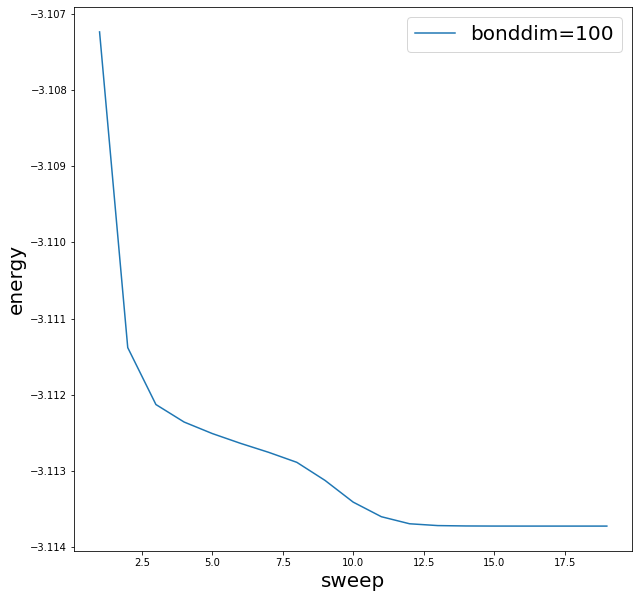

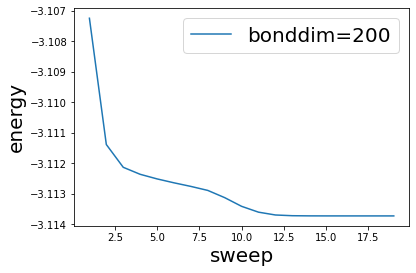

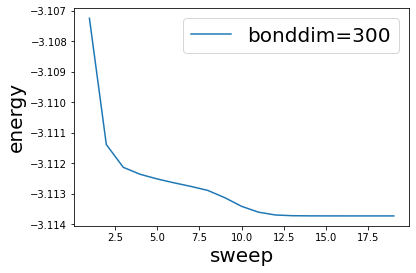

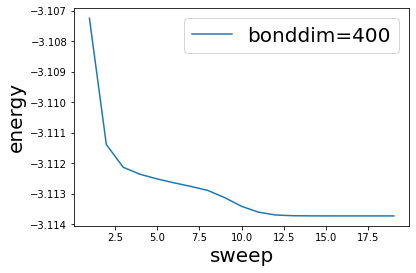

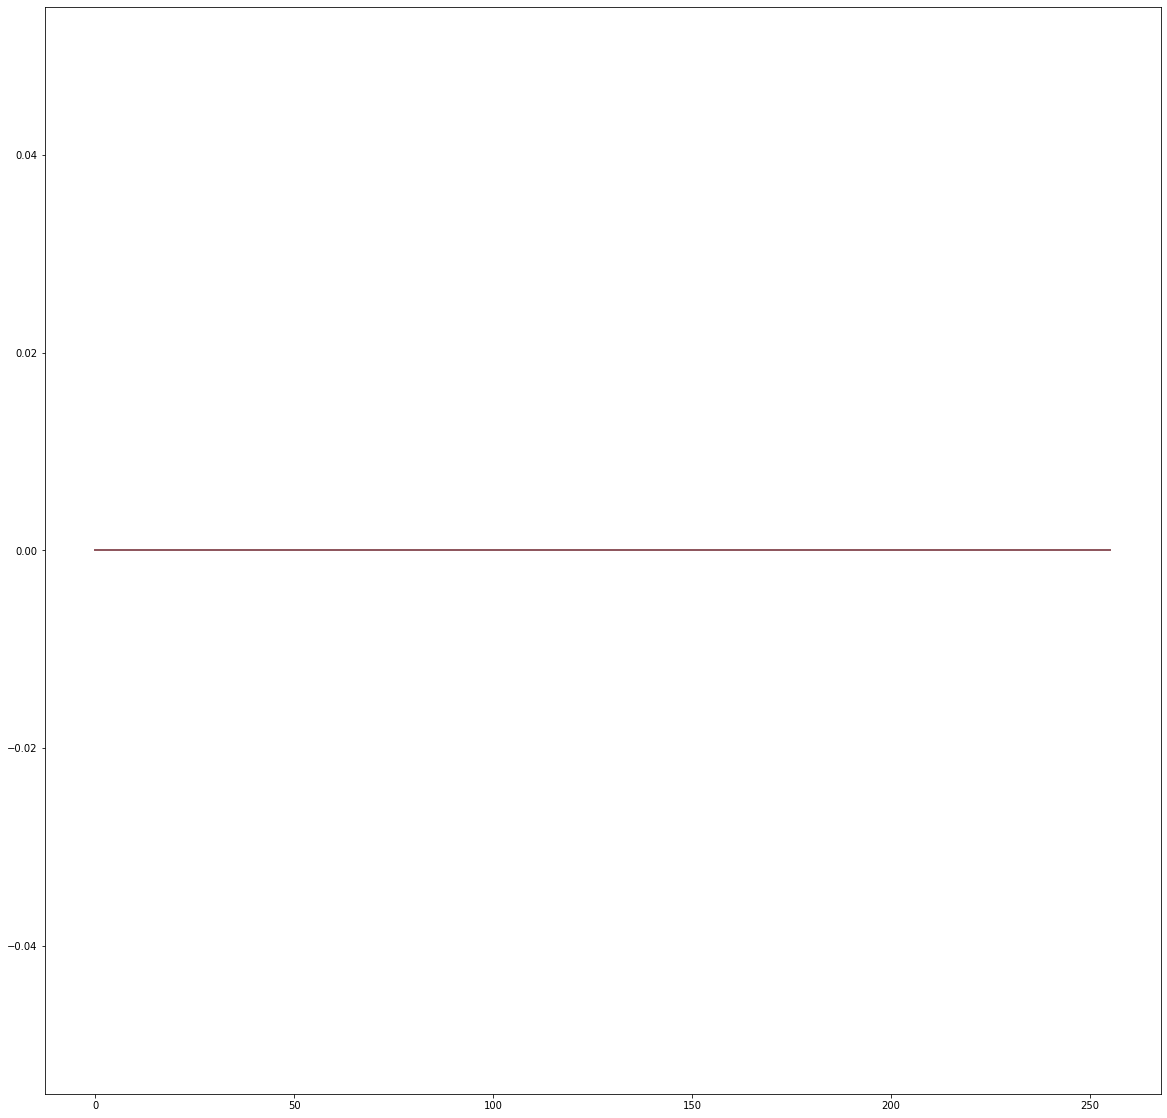

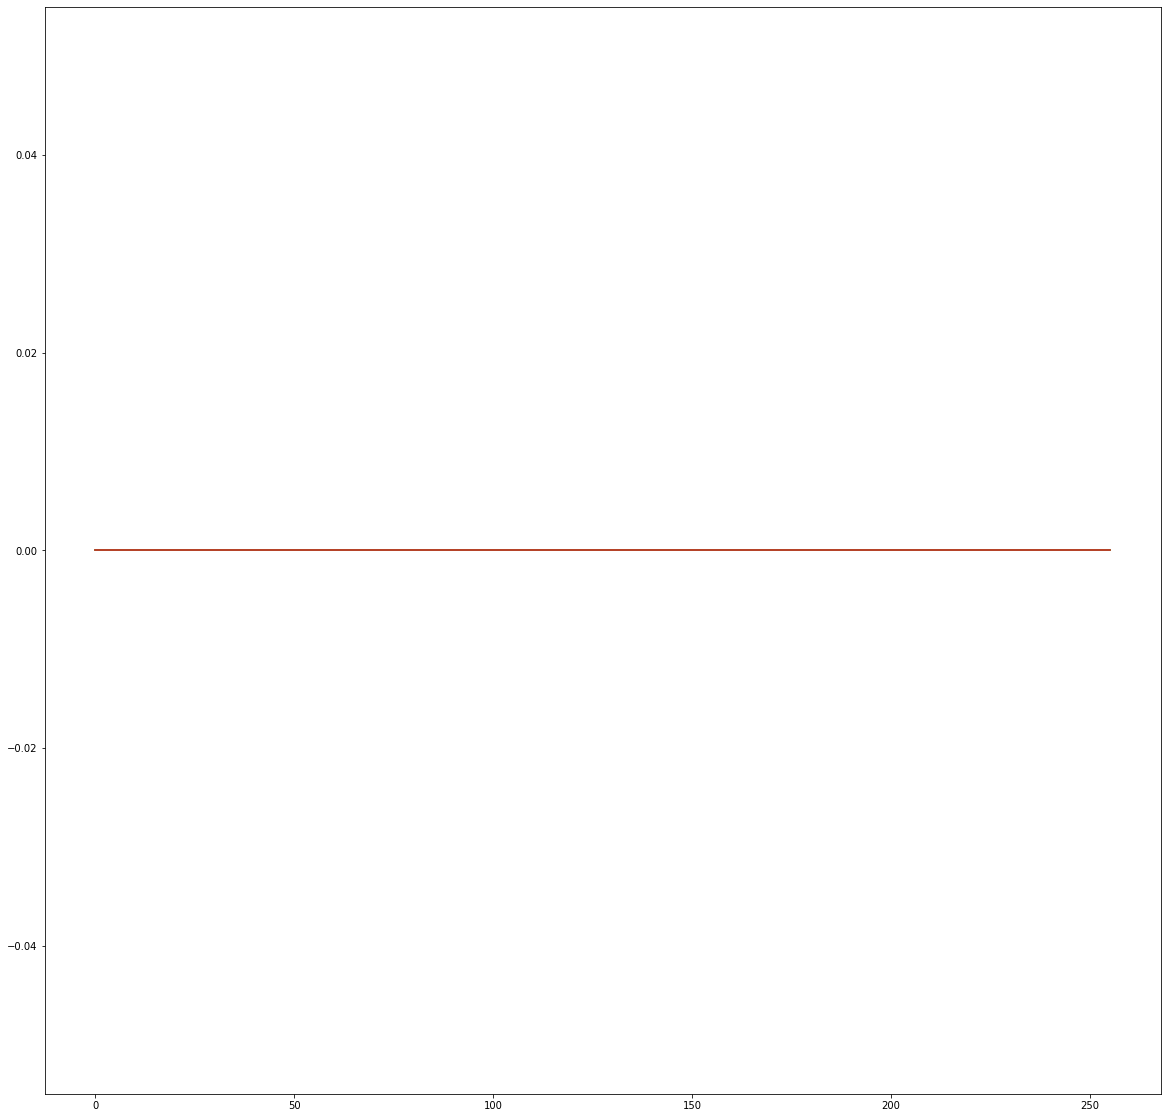

In [6]:
plt.figure(figsize=(10,10))
for i in range(0,bonddim.shape[0]):
    plt.plot(sweeps,eng[i,:],label=f'bonddim={bonddim[i]}')
    plt.legend(fontsize=20)
    plt.xlabel('sweep',fontsize=20)
    plt.ylabel('energy',fontsize=20)
    plt.show()

plt.figure(figsize=(20,20))
for i in range(bonddim.shape[0]):
    for j in range(sweeps.shape[0]):
        plt.plot(v[i,j]-v[-1,-1])
plt.show()


plt.figure(figsize=(20,20))
for i in range(bonddim.shape[0]):
    if np.average(np.abs(z[i,-1]-z[-1,-1]))>10**-3:
        print(bonddim[i])
        
    plt.plot(z[i,-1]-z[-1,-1])
plt.show()